In [1]:
import pandas as pd # Tuodaan pandas-kirjasto.
import matplotlib.pyplot as plt # Tuodaan kuvioiden ja kaavioiden peruskirjasto.
import seaborn as sns # Tuodaan seaborn-kirjasto.
# Tällä komennolla kaaviot saadaan tulostumaan automaattisesti ilman erillistä komentoa.
%matplotlib inline 

plt.style.use('seaborn-whitegrid') # Kaavioiden ulkoasun tyyli.

In [2]:
df = pd.read_csv('http://taanila.fi/sales_data_sample.csv', encoding = 'cp1252')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [16]:
# Tehdään tunnuslukutaulukko, josta näkee myyntien tunnusluvut vuosineljänneksittäin.
QTR_ID = ['Q1', 'Q2', 'Q3', 'Q4'] # Lisätään vuosineljänneksien tekstimuotoiset arvot.
DEALSIZE = ['Small', 'Medium', 'Large']

In [12]:
df1 = df.groupby('QTR_ID')['SALES'].describe()
df1.index = QTR_ID
df1.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Q1,665,3535,1735,684,2231,3222,4518,10067
Q2,561,3651,2113,482,2115,3138,4597,14083
Q3,503,3497,1782,578,2152,3099,4462,10994
Q4,1094,3542,1782,695,2228,3207,4474,12536


[Text(0, 0, 'Q1'), Text(0, 0, 'Q2'), Text(0, 0, 'Q3'), Text(0, 0, 'Q4')]

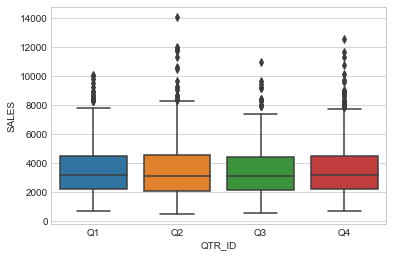

In [13]:
# Edellinen boxplot-kuviona, josta nähdään pienin, alaneljännes, mediaani, yläneljännes, suurin ja poikkeavat arvot.
ax1 = sns.boxplot(x='QTR_ID', y='SALES', data=df)
ax1.set_xticklabels(QTR_ID)

In [17]:
df1 = df.groupby('DEALSIZE')['SALES'].describe()
df1.index = DEALSIZE
df1.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Small,157,8294,1295,7016,7329,8009,8755,14083
Medium,1384,4398,1047,3002,3516,4163,5176,6996
Large,1282,2062,577,482,1638,2114,2545,3000


[Text(0, 0, 'Small'), Text(0, 0, 'Medium'), Text(0, 0, 'Large')]

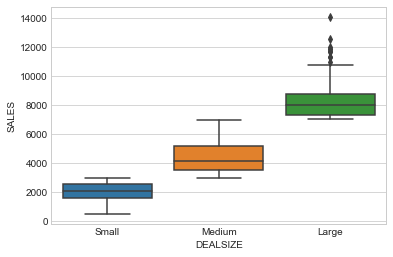

In [18]:
# Edellinen boxplot-kuviona, josta nähdään pienin, alaneljännes, mediaani, yläneljännes, suurin ja poikkeavat arvot.
ax1 = sns.boxplot(x='DEALSIZE', y='SALES', data=df)
ax1.set_xticklabels(DEALSIZE)

In [19]:
df3 = df.pivot_table(values='SALES', index='DEALSIZE', columns='QTR_ID', margins=True)
df3.index = DEALSIZE + ['Kaikki']
df3.columns = QTR_ID + ['Kaikki']
df3.style.format('{:.0f}')

,Q1,Q2,Q3,Q4,Kaikki
Small,8121,8532,8174,8245,8294
Medium,4371,4384,4423,4411,4398
Large,2080,1997,2076,2077,2062
Kaikki,3535,3651,3497,3542,3554


In [21]:
# Vertailtavien ryhmien muodostaminen
s1 = df['SALES'][df['QTR_ID']==1]
s2 = df['SALES'][df['QTR_ID']==2]
s3 = df['SALES'][df['QTR_ID']==3]
s4 = df['SALES'][df['QTR_ID']==4]

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(s1, s2, equal_var=False)

Ttest_indResult(statistic=-1.0360074922179652, pvalue=0.3004299515552587)